In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import pickle


import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 500)

In [2]:
last_n_dict = pickle.load(open("last_n_dict.p", "rb" ) )

In [17]:
last5 = last_n_dict[5]

In [48]:
def plyr_train_test(data_dict, player, n = 5):
    data = data_dict[n]
    player_df = data.loc[data.player_name == player].loc[~data.fscore_exp.isnull()].drop('above_avg_fscore',1)
    x_train = player_df.loc[:,'days_off':][:round((.8*len(player_df)))]
    x_train['home'] = data.home.loc[data.player_name == player]
    y_train = player_df.fscore[:round((.8*len(player_df)))]

    x_test = player_df.loc[:,'days_off':][round((.8*len(player_df))):]
    x_test['home'] = data.home.loc[data.player_name == player]
    y_test = player_df.fscore[round((.8*len(player_df))):]
    
    return x_train, x_test, y_train, y_test

0.5722964345836872


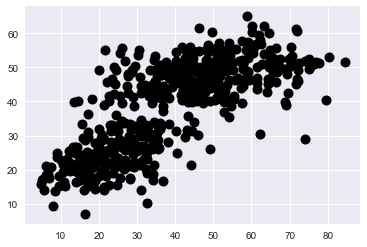

In [77]:
x_train, x_test, y_train, y_test= plyr_train_test(last_n_dict, 'James Harden')

poly_ridge = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1)),
        ("scaler", StandardScaler()),
        ("ridge", Ridge())
    ])

poly_ridge.fit(x_train, y_train)
y_pred = poly_ridge.predict(x_train)
print(poly_ridge.score(x_train, y_train))

# Plot regression line
plt.scatter(y_train, y_pred, color='black', linewidth=3)
plt.show()

In [78]:
def plyr(data, player_name):
    return data.loc[data.player_name == player_name]



In [79]:
harden = plyr(last5, 'James Harden')


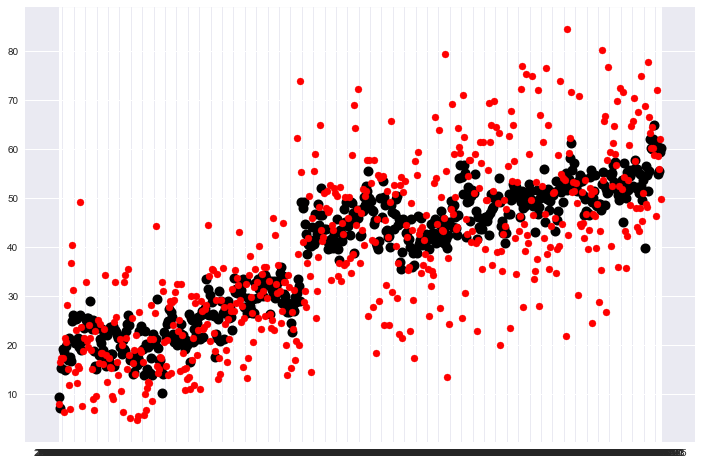

In [80]:
y_pred = poly_ridge.predict(x_train)
plt.figure(figsize = (12,8))
plt.scatter(harden.game_date[:round((.8*len(harden)))], y_pred, color='black', linewidth=3)
plt.scatter(harden.game_date[:round((.8*len(harden)))], harden.fscore[:round((.8*len(harden)))], color='red')
plt.show()

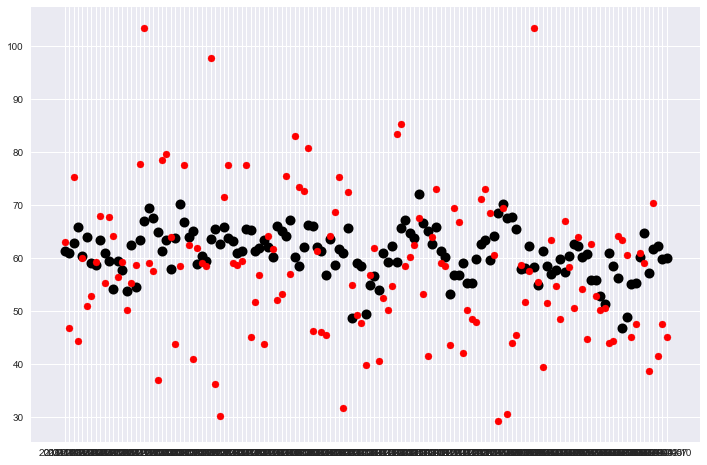

In [81]:
y_pred = poly_ridge.predict(x_test)
plt.figure(figsize = (12,8))
plt.scatter(harden.game_date[round((.8*len(harden))):], y_pred, color='black', linewidth=3)
plt.scatter(harden.game_date[round((.8*len(harden))):], harden.fscore[round((.8*len(harden))):], color='red')
plt.show()

In [82]:
len(harden.game_date[:round((.9*len(harden)))])

618

In [83]:
def avg_rmse(X,y, model, cv=5):
    scores = cross_val_score(model, X, y,
                             scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [84]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

14.078206546259837